Sentiment Analysis using LSTM Classification

In [ ]:
import pandas as pd
data = pd.read_csv('Tweets.csv')

In [ ]:
review_data = data[['text','airline_sentiment']]
print(review_data.shape)
review_data.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
review_data = review_data[review_data['airline_sentiment'] != 'neutral']
print(review_data.shape)
review_data.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
review_data['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_label = review_data.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = review_data.text.values

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 83s 272ms/step - loss: 0.3846 - accuracy: 0.8427 - val_loss: 0.2125 - val_accuracy: 0.9233
Epoch 2/5
289/289 [==============================] - 80s 276ms/step - loss: 0.2146 - accuracy: 0.9151 - val_loss: 0.1732 - val_accuracy: 0.9381
Epoch 3/5
289/289 [==============================] - 79s 275ms/step - loss: 0.1638 - accuracy: 0.9367 - val_loss: 0.1688 - val_accuracy: 0.9415
Epoch 4/5
289/289 [==============================] - 79s 274ms/step - loss: 0.1323 - accuracy: 0.9511 - val_loss: 0.1643 - val_accuracy: 0.9476
Epoch 5/5
289/289 [==============================] - 78s 272ms/step - loss: 0.1119 - accuracy: 0.9561 - val_loss: 0.1705 - val_accuracy: 0.9428


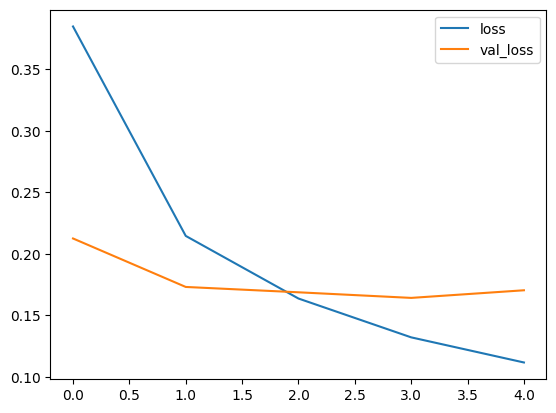

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

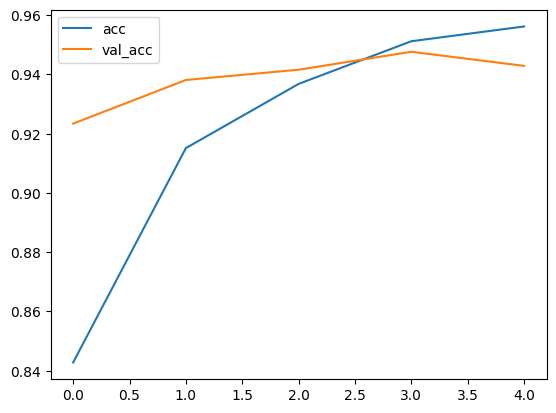

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 298ms/step
Predicted label:  positive
1/1 [==============================] - 0s 39ms/step
Predicted label:  negative
